<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#%%writefile-README.MD" data-toc-modified-id="%%writefile-README.MD-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>%%writefile README.MD</a></span></li><li><span><a href="#Which-city-has-the-highest-gun-violence?" data-toc-modified-id="Which-city-has-the-highest-gun-violence?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Which city has the highest gun violence?</a></span></li><li><span><a href="#Which-year-was-the-most-violent?" data-toc-modified-id="Which-year-was-the-most-violent?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Which year was the most violent?</a></span></li><li><span><a href="#Which-city-in-a-state-is-most-dangerous?" data-toc-modified-id="Which-city-in-a-state-is-most-dangerous?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Which city in a state is most dangerous?</a></span></li><li><span><a href="#Yearly-Casualties" data-toc-modified-id="Yearly-Casualties-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Yearly Casualties</a></span></li><li><span><a href="#How-many-guns-were-involved?" data-toc-modified-id="How-many-guns-were-involved?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>How many guns were involved?</a></span></li><li><span><a href="#Project:-Analysis-of-Gun-Violence-in-USA" data-toc-modified-id="Project:-Analysis-of-Gun-Violence-in-USA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Project: Analysis of Gun Violence in USA</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Glimpse-of-Data" data-toc-modified-id="Glimpse-of-Data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Glimpse of Data</a></span></li><li><span><a href="#Data-Types" data-toc-modified-id="Data-Types-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Data Types</a></span></li><li><span><a href="#Missing-Data" data-toc-modified-id="Missing-Data-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Missing Data</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Datetime-manipulation" data-toc-modified-id="Datetime-manipulation-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Datetime manipulation</a></span></li><li><span><a href="#Create-new-columns" data-toc-modified-id="Create-new-columns-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Create new columns</a></span></li></ul></li><li><span><a href="#Incident-by-State" data-toc-modified-id="Incident-by-State-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Incident by State</a></span></li><li><span><a href="#Incidents-by-Year" data-toc-modified-id="Incidents-by-Year-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Incidents by Year</a></span></li><li><span><a href="#Incidents-by-Month" data-toc-modified-id="Incidents-by-Month-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Incidents by Month</a></span></li><li><span><a href="#Incidents-by-City" data-toc-modified-id="Incidents-by-City-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Incidents by City</a></span></li><li><span><a href="#Incidens-by-Gender" data-toc-modified-id="Incidens-by-Gender-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Incidens by Gender</a></span></li><li><span><a href="#Incidents-by-Age-group" data-toc-modified-id="Incidents-by-Age-group-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Incidents by Age group</a></span></li><li><span><a href="#Incidents-by-#-of-Guns" data-toc-modified-id="Incidents-by-#-of-Guns-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Incidents by # of Guns</a></span></li></ul></div>

# Project: Analysis of Gun Violence in USA

Author: Bhishan Poudel  
Date: Dec 23, 2018  



Data source: https://www.kaggle.com/jameslko/gun-violence-data  

Note: the dataset is 150MB and after zipping it becomes 35MB.


The dataset contains information about the violence caused by possession of 
guns in different cities of USA from 2013 January to 2018 March.

# Imports

In [1]:
import numpy as np
import pandas as pd
import zipfile
import datetime
import itertools

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 500)

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# wordcloud
from wordcloud import WordCloud
from PIL import  Image

In [2]:
%%bash
date
python --version
for i in numpy pandas seaborn
  do
    pip freeze | grep $i
  done
    

Fri Dec 28 11:21:32 EST 2018
Python 3.7.0
numpy==1.15.1
geopandas==0.4.0
pandas==0.23.4
pandasql==0.7.3
seaborn==0.9.0


# Glimpse of Data

In [3]:
fname = "gun-violence-data_01-2013_03-2018.csv"
zf = zipfile.ZipFile('data/' + fname + '.zip')
df = pd.read_csv(zf.open(fname))
print(df.shape)
df.head(2)

(239677, 29)


,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,gun_type,incident_characteristics,latitude,location_description,longitude,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275,False,14.00,NaN,NaN,"Shot - Wounded/Injured||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Possession (gun(s) found during commission of other crimes)||Possession of gun by felon or prohibited person",40.35,NaN,-79.86,nan,Julian Sims under investigation: Four Shot and Injured,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injured||4::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect,http://pittsburgh.cbslocal.com/2013/01/01/4-people-shot-in-mckeesport/||http://www.wtae.com/news/local/allegheny/U-S-Marshals-task-force-arrests-New-Year-s-party-shooting-suspect/17977588||http://www.post-gazette.com/local/south/2013/01/17/Man-arrested-in-New-Year-s-Eve-shooting-in-McKeesport/stories/201301170275,nan,nan
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/20130105/NEWS/130109127,False,43.00,NaN,NaN,"Shot - Wounded/Injured||Shot - Dead (murder, accidental, suicide)||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Gang involvement",33.91,NaN,-118.33,nan,Four Shot; One Killed; Unidentified shooter in getaway car,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4::Subject-Suspect,http://losangeles.cbslocal.com/2013/01/01/man-killed-3-wounded-at-nye-party-in-hawthorne/||http://latimesblogs.latimes.com/lanow/2013/01/hawthorne-new-year-party-three-killed.html||https://usgunviolence.wordpress.com/2013/01/01/killed-man-hawthorne-ca/||http://www.dailybulletin.com/article/zz/20130105/NEWS/130109127,62.00,35.00


In [4]:
df.columns.values

array(['incident_id', 'date', 'state', 'city_or_county', 'address',
       'n_killed', 'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship',
       'participant_status', 'participant_type', 'sources',
       'state_house_district', 'state_senate_district'], dtype=object)

In [5]:
df = df[['incident_id', 'date', 'state', 'city_or_county',
         'n_killed', 'n_injured', 'n_guns_involved', 'gun_stolen', 'gun_type',
         'participant_age_group', 'participant_gender']]

df.head(2)

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,gun_stolen,gun_type,participant_age_group,participant_gender
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,nan,NaN,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+,0::Male||1::Male||3::Male||4::Female
1,460726,2013-01-01,California,Hawthorne,1,3,nan,NaN,NaN,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+,0::Male


# Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 11 columns):
incident_id              239677 non-null int64
date                     239677 non-null object
state                    239677 non-null object
city_or_county           239677 non-null object
n_killed                 239677 non-null int64
n_injured                239677 non-null int64
n_guns_involved          140226 non-null float64
gun_stolen               140179 non-null object
gun_type                 140226 non-null object
participant_age_group    197558 non-null object
participant_gender       203315 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 20.1+ MB


# Missing Data

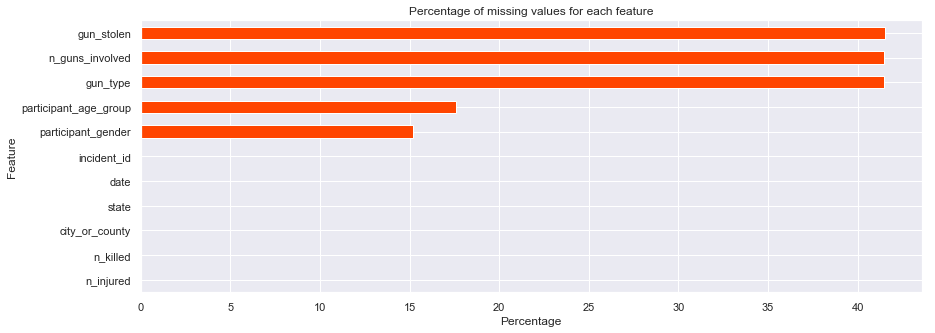

In [7]:
def plot_missing_data(df):
    df.isna().mean().mul(100).iloc[::-1].sort_values().plot(
        kind='barh', figsize=(14,5), grid=True, 
        title='Percentage of missing values for each feature', color='#ff4500')
    plt.xlabel('Percentage')
    plt.ylabel('Feature')
    plt.show()
    
plot_missing_data(df)

In [8]:
# here columns have format 0::feature_name, so we convert nans to this format.
df["gun_stolen"] = df["gun_stolen"].fillna("0::Unknown")
df["gun_type"] = df["gun_type"].fillna("0::Unknown")
df["participant_age_group"] = df["participant_age_group"].fillna("0::Unknown")
df["participant_gender"] = df["participant_gender"].fillna("0::Unknown")

# if guns involved is nan, make it zero.
df["n_guns_involved"] = df["n_guns_involved"].fillna(0)


df[df['participant_gender'].str.contains("::Unknown")].head(2)

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,gun_stolen,gun_type,participant_age_group,participant_gender
38,482926,2013-03-16,California,Galt,0,7,0.00,0::Unknown,0::Unknown,0::Unknown,0::Unknown
40,482942,2013-03-17,Florida,Belle Glade,0,5,0.00,0::Unknown,0::Unknown,0::Unknown,0::Unknown


In [9]:
# checking missing data
def missing_percent(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing

missing_percent(df)

,Total,Percent
participant_gender,0,0.00
participant_age_group,0,0.00
gun_type,0,0.00
gun_stolen,0,0.00
n_guns_involved,0,0.00
n_injured,0,0.00
n_killed,0,0.00
city_or_county,0,0.00
state,0,0.00
date,0,0.00


# Feature Engineering

## Datetime manipulation

In [10]:
df['date'] = pd.to_datetime(df['date'])
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year
df["weekday"] = df["date"].dt.weekday
df["week"] = df["date"].dt.week
df["day_of_week"] = df[['date']].apply(lambda x: datetime.datetime.strftime(x['date'], '%a'), axis=1)
df["month_name"] = df[['date']].apply(lambda x: datetime.datetime.strftime(x['date'], '%b'), axis=1)

df.index = df['date']
df.head(2)

,incident_id,date,state,city_or_county,n_killed,n_injured,n_guns_involved,gun_stolen,gun_type,participant_age_group,participant_gender,day,month,year,weekday,week,day_of_week,month_name
date,,,,,,,,,,,,,,,,,,
2013-01-01,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,0.00,0::Unknown,0::Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+||4::Adult 18+,0::Male||1::Male||3::Male||4::Female,1,1,2013,1,1,Tue,Jan
2013-01-01,460726,2013-01-01,California,Hawthorne,1,3,0.00,0::Unknown,0::Unknown,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::Adult 18+,0::Male,1,1,2013,1,1,Tue,Jan


## Create new columns

In [11]:
df["casualities"] = df["n_killed"] + df["n_injured"]
df["gender_total"] = df['participant_gender'].apply(lambda x: len(x.split('||')))

In [12]:
def return_count(row, phrase):
    return sum([_.count(phrase) for _ in row.split('||')])

row = "0::Female||1::Male||2::Male||3::Female"
phrase = "Female"
phrase = "Male"
return_count(row,phrase)

2

In [13]:
df["male"] = df['participant_gender'].apply(return_count, args=("Male",))
df["female"] = df['participant_gender'].apply(return_count, args=("Female",))
df["gender_unknown"] = df['participant_gender'].apply(return_count, args=("Unknown",))

In [14]:
df["stolen"] = df["gun_stolen"].apply(return_count, args=("Stolen",))
df["notstolen"] = df["gun_stolen"].apply(return_count, args=("Not-stolen",))

In [15]:
df["child"] = df["participant_age_group"].apply(return_count, args=("Child 0-11",))
df["teen"] = df["participant_age_group"].apply(return_count, args=("Teen 12-17",))
df["adult"] = df["participant_age_group"].apply(return_count, args=("Adult 18+",))

# Incident by State

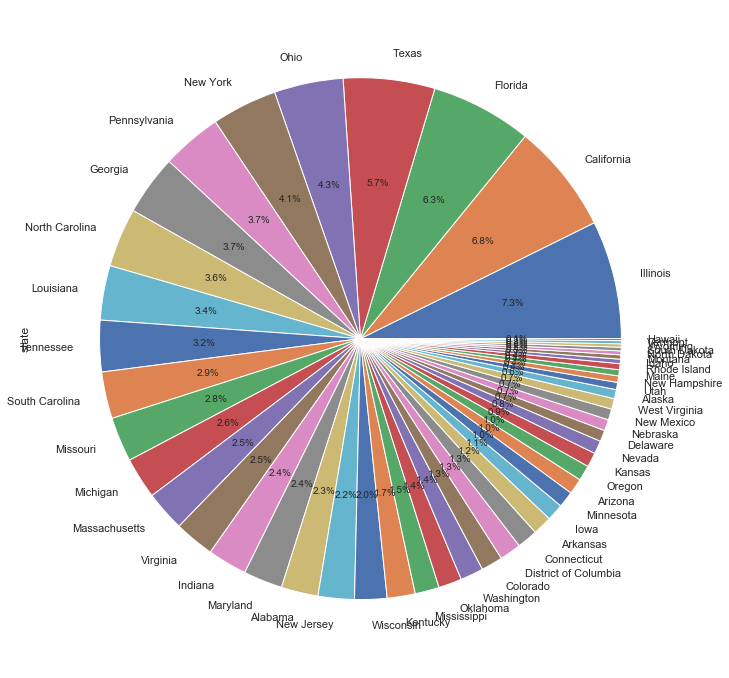

In [16]:
df["state"].value_counts().plot.pie(autopct="%1.1f%%",figsize=(12,12))

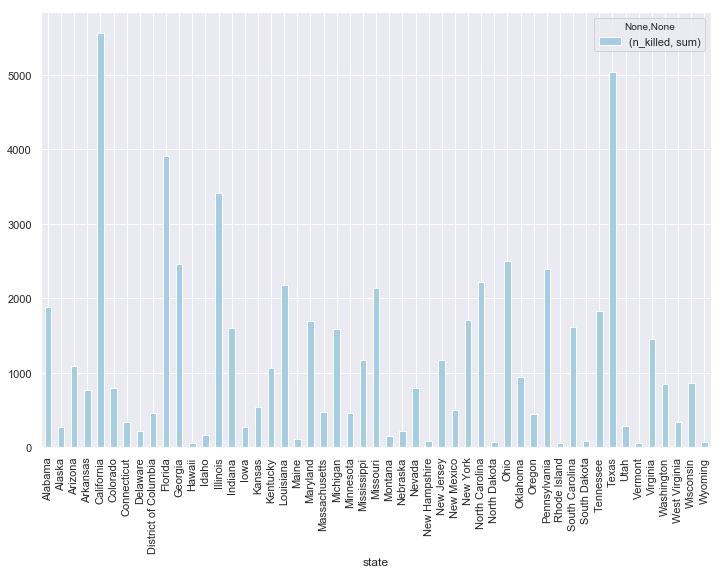

In [17]:
(df.groupby('state')
 .agg({'n_killed':['sum']})
 .plot
 .bar(figsize=(12,8), colormap='Paired'));

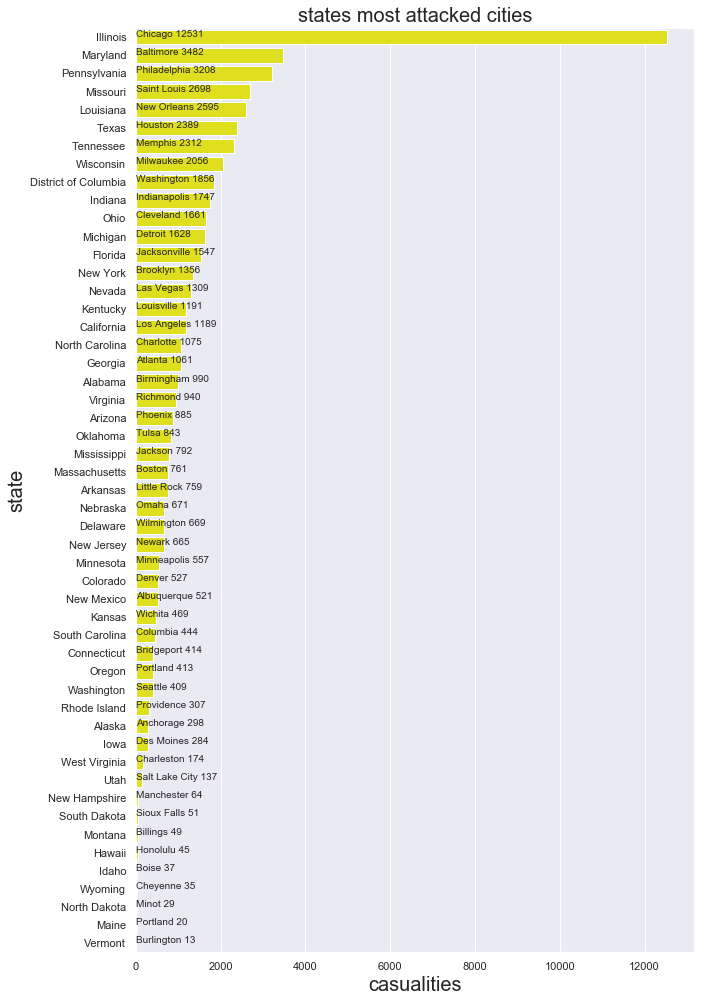

In [18]:
def plot_barh2(df,x1,x2,y):
    """
    e.g.
    x1, x2 = state, city
    y = income
    """
    df1 = (df.groupby([x1,x2])[y]
           .sum()
           .reset_index()
           .sort_values(by=y,ascending=False)
           .drop_duplicates(subset=[x1],keep="first"))

    fig = plt.figure(figsize=(10,17))
    ax = sns.barplot(y = x1,x = y, data = df1,
                     palette=['yellow'])

    for i,j in enumerate(df1.values):
        ax.text(.7,i,j[1]+ ' ' + str(j[2]) ,fontsize =10)

    plt.title("states most attacked cities",fontsize = 20)
    plt.xlabel(y,fontsize = 20)
    plt.ylabel(x1,fontsize = 20)
    fig.set_facecolor("w");

plot_barh2(df,"state","city_or_county","casualities")

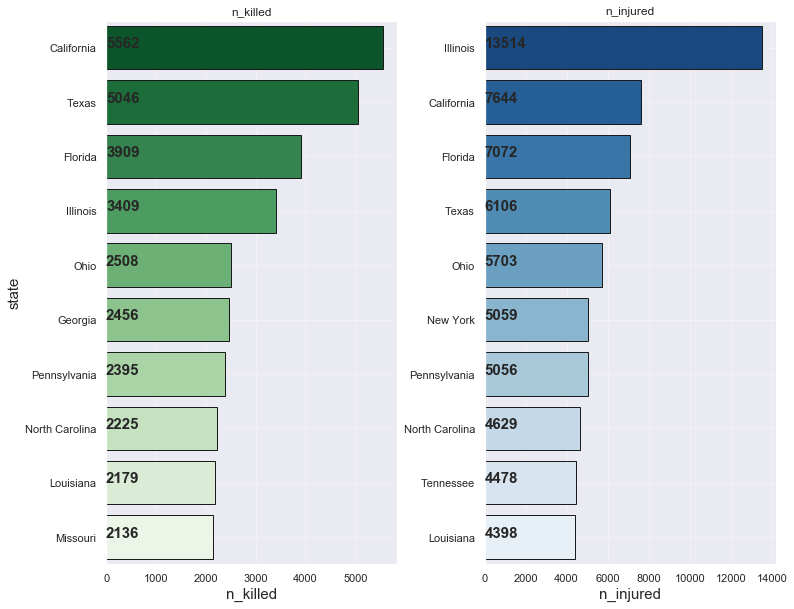

In [19]:
def two_barplots(df,x1,x2,y):
    df1 = df.groupby(y)[x1].sum().reset_index().sort_values(by=x1,ascending=False)
    df2 = df.groupby(y)[x2].sum().reset_index().sort_values(by=x2,ascending=False)
    NUM = 10

    fig = plt.figure(figsize=(12,10))

    # first plot
    plt.subplot(121)
    ax = sns.barplot(x=x1, y = y,data=df1[:NUM],
                     palette="Greens_r",linewidth=1,edgecolor = "k"*NUM)
    plt.ylabel(y,fontsize=15)
    plt.xlabel(x1,fontsize=15)
    plt.title(x1)
    for i,j in enumerate(df1[x1][:NUM]):
        ax.text(.9,i,j,weight="bold",fontsize=15)
    plt.grid(True,alpha= .3)


    # second plot
    plt.subplot(122)
    ax = sns.barplot(x=x2,y=y,data=df2[:NUM],
                     palette="Blues_r",linewidth=1,edgecolor = "k"*NUM)
    plt.ylabel("")
    plt.xlabel(x2,fontsize=15)
    plt.subplots_adjust(wspace=.3)
    plt.title(x2)
    for i,j in enumerate(df2[x2][:NUM]):
        ax.text(.9,i,j,weight="bold",fontsize=15)
    plt.grid(True,alpha= .3)

    fig.set_facecolor("w");
    
two_barplots(df,"n_killed","n_injured", "state")

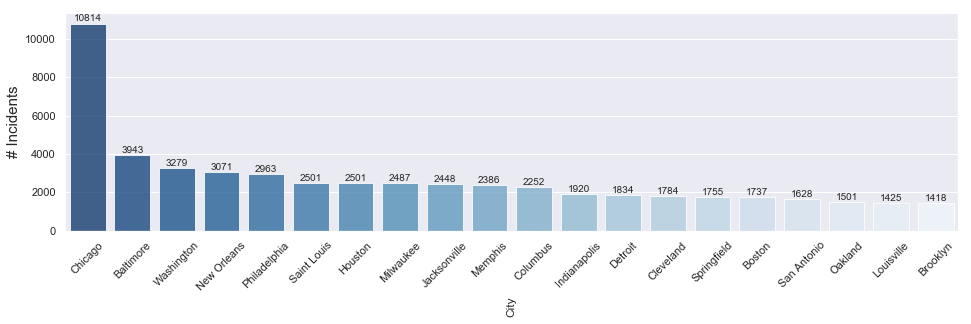

In [20]:
def barplot(df):
    """
    Example: 
    df1 = df['c0'].value_counts().nlargest(10)
    """
    plt.figure(figsize=(16,4))
    ax = sns.barplot(x=df1.index, y=df1.values, alpha=0.8,palette='Blues_r')
    plt.ylabel('# Incidents', fontsize=15)
    plt.xlabel('City', fontsize=12,rotation=90)

    # total counts
    rects = ax.patches
    labels = df1.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height + 5, label, ha='center', va='bottom')
        
    loc, labels = plt.xticks()
    ax.set_xticklabels(labels, rotation=45)
    plt.show()
    
df1 = df['city_or_county'].value_counts().nlargest(20)   
barplot(df1)

# Incidents by Year

In [21]:
df1 = df[['year','n_killed','n_injured','casualities']].groupby('year').sum()
df1.head()

,n_killed,n_injured,casualities
year,,,
2013,317,979,1296
2014,12557,23002,35559
2015,13484,26967,40451
2016,15066,30580,45646
2017,15511,30703,46214


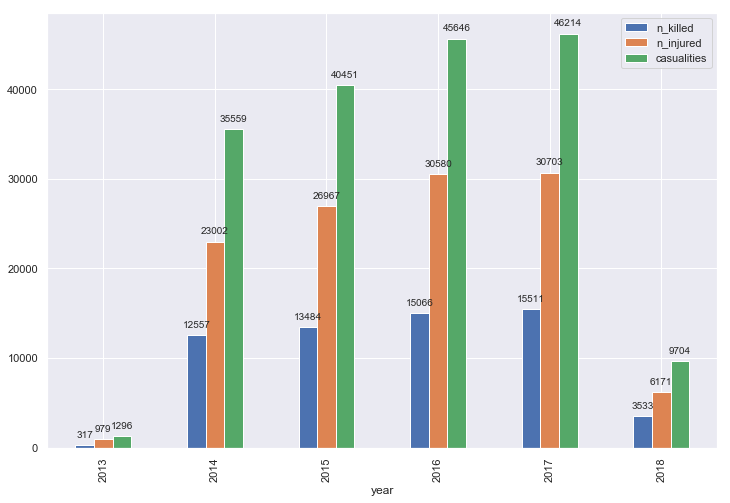

In [22]:
def plot_bar_total_pd(df1):
    ax = df1.plot(kind='bar',figsize=(12,8))
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), 
                    (p.get_x()+p.get_width()/2.,p.get_height()), 
                    ha='center', 
                    va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')
plot_bar_total_pd(df1)

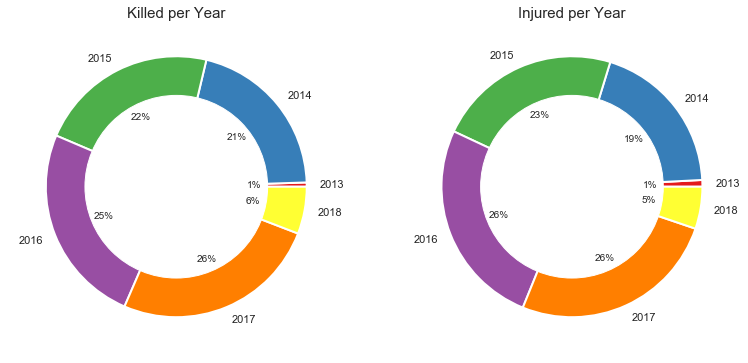

In [23]:
def stacked_pieplots(df,x,y1,y2):
    df1 = df.groupby(x)[[y1,y2]].sum()
    fig = plt.figure(figsize=(13,6))

    # plot 1
    plt.subplot(121)
    plt.pie(df1[y1],
            labels=df1.index,
            autopct="%1.0f%%",shadow=False,
            colors=sns.color_palette("Set1",7),
            wedgeprops={"linewidth":2,"edgecolor":"white"})
    my_circ = plt.Circle((0,0),.7,color="w")
    plt.gca().add_artist(my_circ)
    plt.title("Killed per Year",fontsize=15)

    # plot 2
    plt.subplot(122)
    plt.pie(df1[y2],
            labels=df1.index,
            autopct="%1.0f%%",shadow=False,
            colors=sns.color_palette("Set1",7),
            wedgeprops={"linewidth":2,"edgecolor":"white"})
    my_circ = plt.Circle((0,0),.7,color="w")
    plt.gca().add_artist(my_circ)
    plt.title("Injured per Year",fontsize=15)
    fig.set_facecolor("w");
    
stacked_pieplots(df,'year','n_killed', 'n_injured')

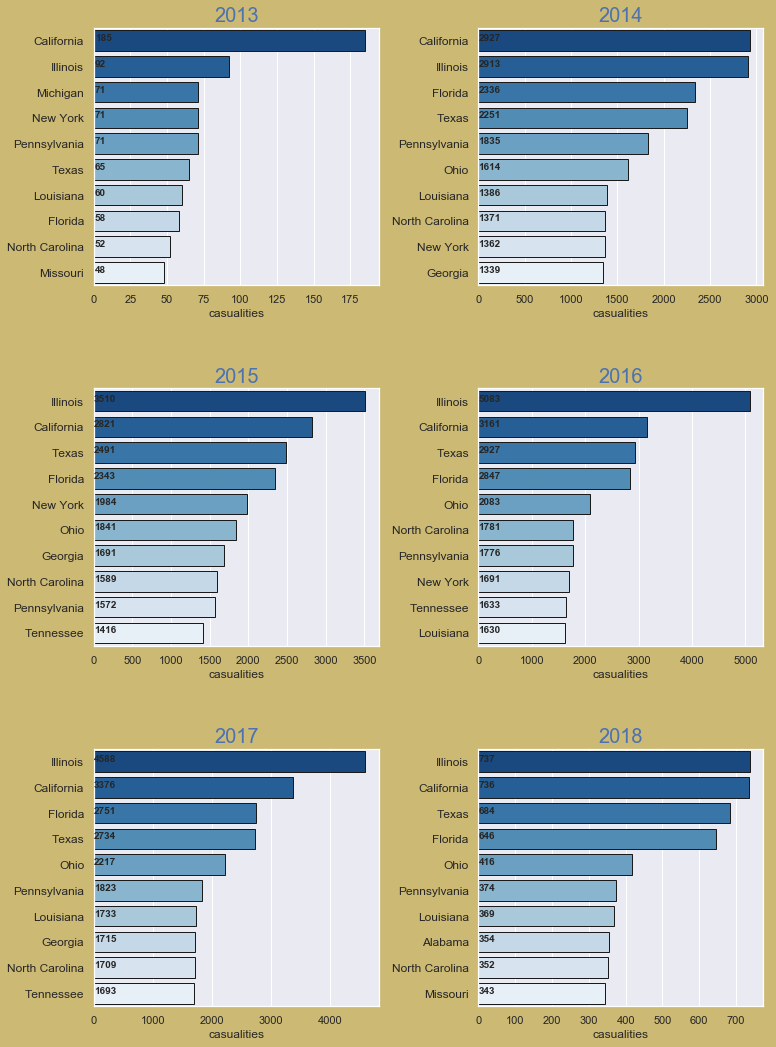

In [24]:
def yearly_barplots(df,x1,x2,y):
    """
    Example:
    x1 = year
    x2 = state
    y = casualities
    """
    df1 = (df.groupby([x1,x2])[[y]]
           .sum()
           .reset_index()
           .sort_values(by=[x1,y],ascending=False))

    years  = df[x1].unique().tolist()
    length = len(years)

    fig = plt.figure(figsize=(12,18))
    NUM = 10

    for i,j in itertools.zip_longest(years,range(length)):
        plt.subplot(3,2,j+1)
        ax = sns.barplot(y,x2,
                         data=df1[df1[x1] == i][:NUM],
                         palette="Blues_r",
                         linewidth = 1 ,
                         edgecolor = "k"*NUM)
        plt.title(i,fontsize=20,color="b")
        plt.ylabel("")
        plt.subplots_adjust(wspace=.35,hspace=.4)
        plt.yticks(fontsize=12)
        for i,j in enumerate(df1[df1[x1] == i][y][:NUM]):
            plt.text(.7,i,j,weight="bold")
        fig.set_facecolor("y")
        
yearly_barplots(df,"year","state","casualities")

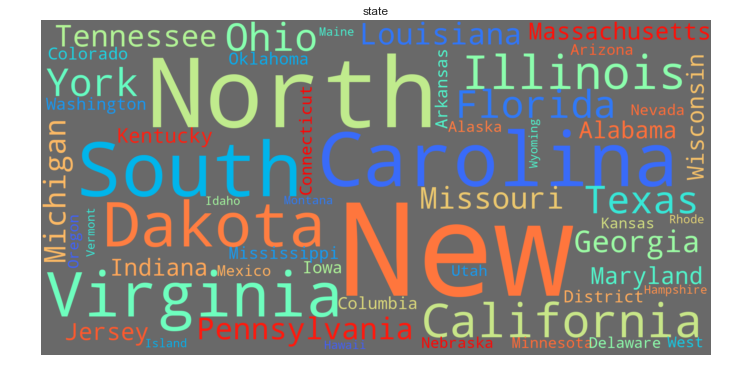

In [25]:
def wordcloud(df,x):
    words = df[x].value_counts().keys()
    wc = WordCloud(max_words=60,scale=5,colormap="rainbow",
                   background_color="dimgrey").generate(" ".join(words))
    plt.figure(figsize=(12,8))
    plt.imshow(wc,interpolation="bilinear")
    plt.axis("off")
    plt.title(x)
    
wordcloud(df,'state')

# Incidents by Month

In [26]:
df1 = df[["month", "n_killed","n_injured",'casualities']].groupby("month").sum()
df1.index = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1.head()       
#  .plot(kind='barh',stacked=True));


# ax.set_yticklabels(mymonths); # note that here x axis was already sorted

,n_killed,n_injured,casualities
Jan,6035,10946,16981
Feb,4945,8420,13365
Mar,5641,10475,16116
Apr,4383,8907,13290
May,4830,10244,15074


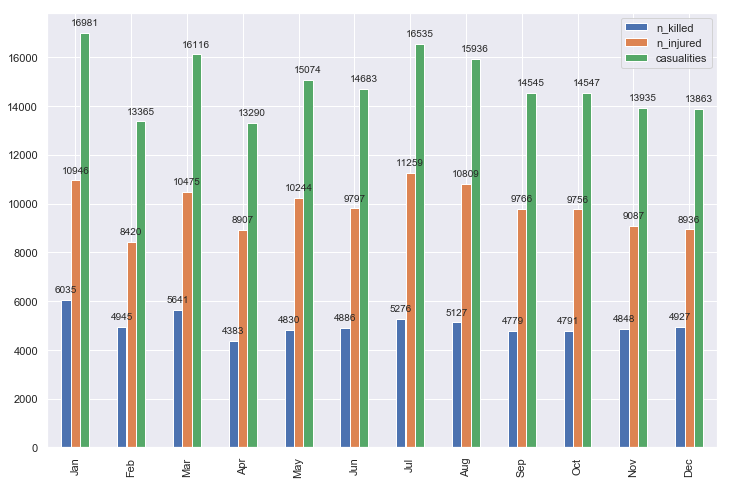

In [27]:
plot_bar_total_pd(df1)

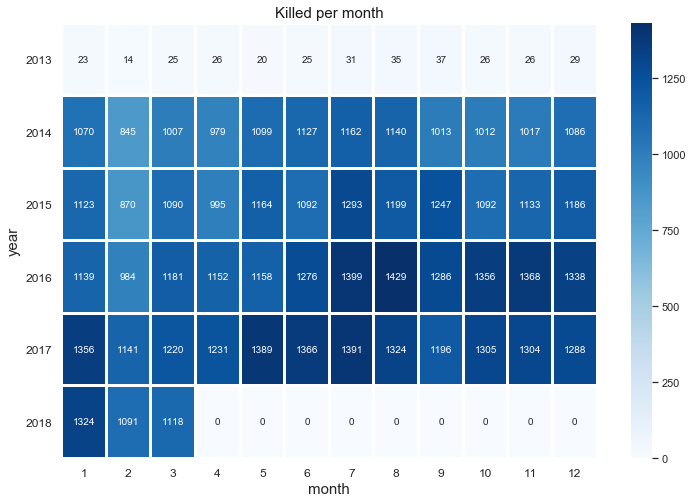

In [28]:
def heatmap_3cols(df,idx,col,val):
    df1 = (pd.pivot_table(index=idx,
                         columns=col,
                         values=val,
                         data=df,
                         aggfunc="sum")
                         .fillna(0))

    for i in df1.columns:
        df1[i] = df1[i].astype(np.int64)

    plt.figure(figsize=(12,8))
    fig = sns.heatmap(df1.transpose(),
                      cmap="Blues",
                      annot=True,
                      fmt="d",
                      linecolor="white",
                      linewidths=2)

    plt.xticks(fontsize =12)
    plt.yticks(fontsize =12,rotation=0)
    plt.ylabel(col,fontsize=15)
    plt.xlabel(idx,fontsize=15)
    plt.title('Killed per month',fontsize=15,color="k")
    plt.show()

heatmap_3cols(df,'month','year','n_killed')

# Incidents by City

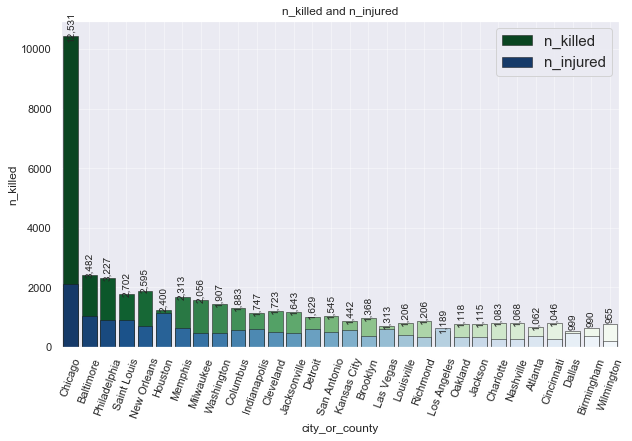

,city_or_county,n_killed,n_injured,y_sum
2019,Chicago,2104,10427,12531
530,Baltimore,1055,2427,3482
9018,Philadelphia,901,2326,3227
10152,Saint Louis,919,1783,2702
8060,New Orleans,703,1892,2595


In [29]:
def stacked_barplot2(df, x, y1, y2):
    """
    WARNING:
    The total only works when column x is sring dtype.
    It does not work for numbers, e.g. year column
        even if I converted column dtype as str.
    
    """
    NUM = 30
    df1 = df[[x, y1, y2]].copy()
    df1['y_sum'] = df1[y1] + df1[y2]
    df1 = (df1.groupby(x)
           .sum()
           .reset_index()
           .sort_values(by="y_sum", ascending=False)[[x, y1, y2]]
           .head(NUM))
    
    plt.figure(figsize=(10, 6))
    
    # plot 1
    ax1 = sns.barplot(x,y2,data=df1,
                      color="b",
                      label=y1,
                      linewidth=.5,
                      palette='Greens_r',
                      edgecolor="k" * df1[x].nunique())

    # total text on top of plot
    for p,d in zip(ax1.patches,df1.values):
        y_sum = '{:,.0f}'.format(d[1]+d[2])
        ax1.annotate(y_sum,(p.get_x()+p.get_width()/2.,p.get_height()),
                     ha='center', 
                     va='center',
                     xytext=(0, 10),
                     rotation=90,
                     textcoords='offset points')
        
    # plot 2
    ax2 = sns.barplot(x, y1, data=df1,
                      color="r", 
                      label=y2,
                      linewidth=.5,
                      palette = 'Blues_r',
                      edgecolor="k" * df1[x].nunique())
    
    plt.legend(loc="best", prop={"size": 15})
    plt.xticks(rotation=70)
    plt.title(y1 + " and " + y2)
    plt.grid(True, alpha=.4)
    plt.show()
    
    df1['y_sum'] = df1[y1] + df1[y2]
    return df1.head()

stacked_barplot2(df, "city_or_county", "n_killed", "n_injured")

# Incidens by Gender

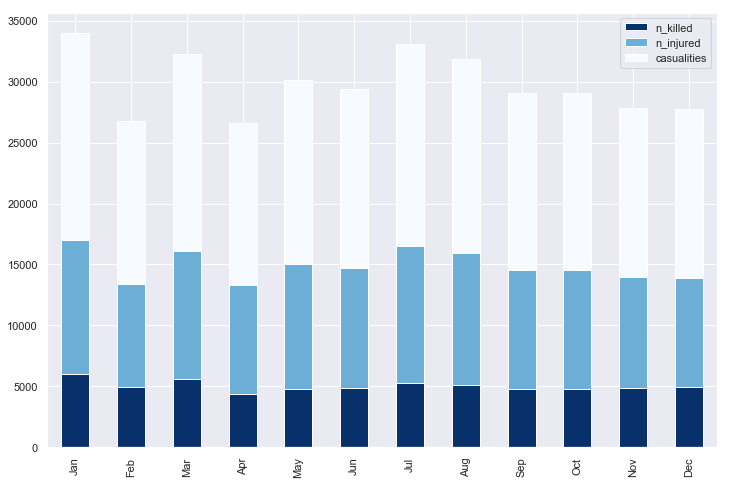

In [30]:
df1.plot(kind='bar',stacked=True,figsize=(12,8),colormap='Blues_r')

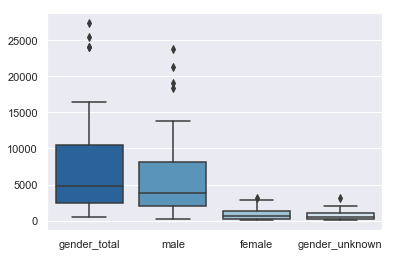

In [31]:
df1= df[["state", "gender_total", "male", "female",
         "gender_unknown"]].groupby(df["state"]).sum()

sns.boxplot(data=df1, palette='Blues_r');

# Incidents by Age group

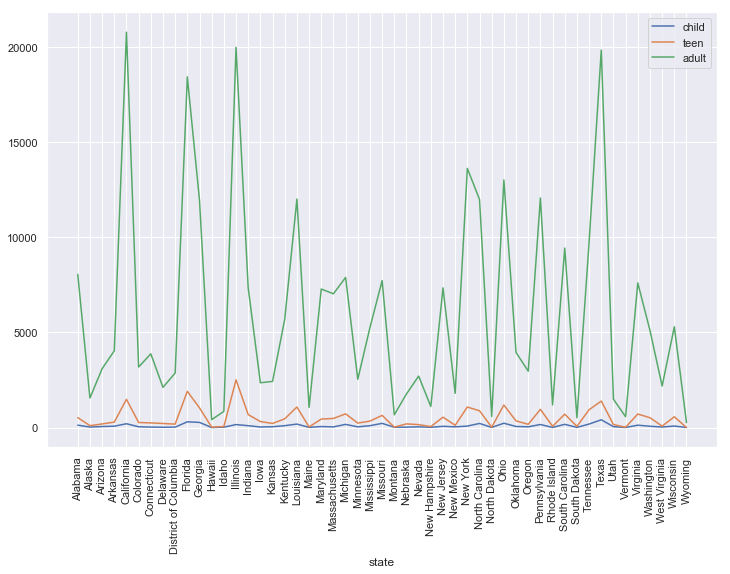

In [32]:
df1 = df[["state","child","teen", "adult"]].groupby(df["state"]).sum()
df1.plot(kind='line',xticks=range(51),rot=90,figsize=(12,8));

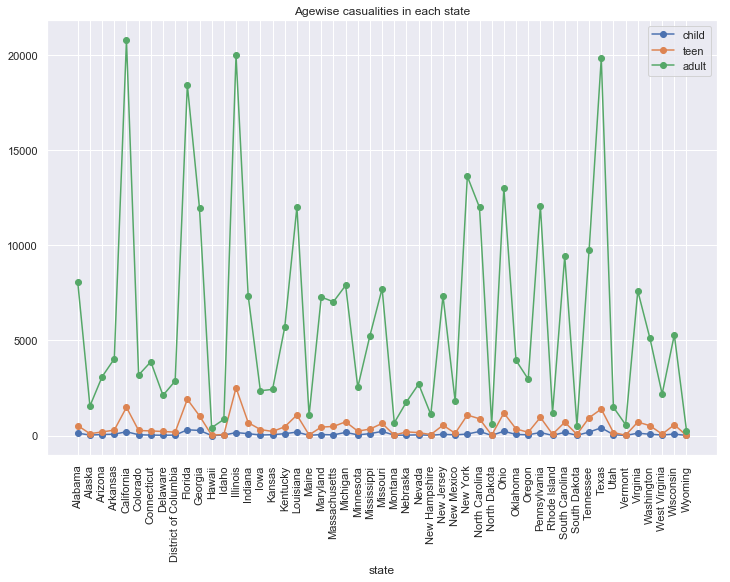

In [33]:
def plot_line_pd(df1):
    df1.plot(kind='line',
             xticks=range(51),
             rot=90,
             marker='o',
             title='Agewise casualities in each state',
             figsize=(12,8));
    
df1 = df[["state","child","teen", "adult"]].groupby(df["state"]).sum()
plot_line_pd(df1)

# Incidents by # of Guns

In [34]:
df1 = (df['n_guns_involved']
       .dropna()
       .apply(lambda x : "2+" if x>2 else str(int(x)))
       .value_counts())

df1.head()

1     127548
0      99451
2       7477
2+      5201
Name: n_guns_involved, dtype: int64

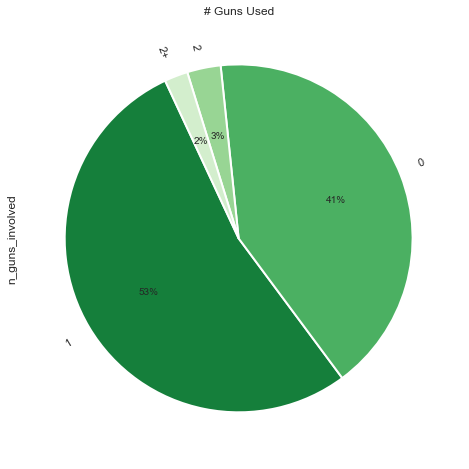

In [35]:
def plot_pie_pd(df1):
    df1.plot(kind='pie',
                 y='values',
                 title='# Guns Used',
                 figsize=(8,8),
                 autopct="%1.0f%%",
                 shadow=False,
                 startangle=115,
                 rotatelabels=True,
                 colors=sns.color_palette("Greens_r",len(df1)),
                 wedgeprops={"linewidth":2,"edgecolor":"white"});
plot_pie_pd(df1)